In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
dt = pd.read_csv('test.csv')

In [3]:
#Understand the type of data.
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
dt.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
df.dtypes.nunique()

3

In [6]:
df.shape

(9557, 143)

In [7]:
df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [8]:
df.nunique()

Id                 9557
v2a1                157
hacdor                2
rooms                11
hacapo                2
                   ... 
SQBovercrowding      38
SQBdependency        31
SQBmeaned           155
agesq                97
Target                4
Length: 143, dtype: int64

In [9]:
df.isnull().sum().sort_values().tail(10)

cielorazo            0
techootro            0
techocane            0
techoentrepiso       0
techozinc            0
SQBmeaned            5
meaneduc             5
v2a1              6860
v18q1             7342
rez_esc           7928
dtype: int64

In [10]:
##Check if there are any biases in your dataset.
df["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

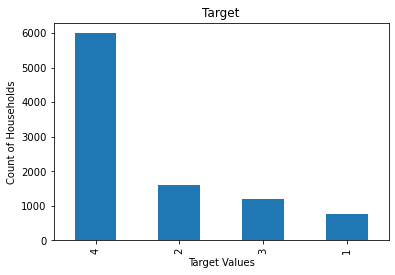

In [11]:
df['Target'].value_counts().plot.bar()
plt.xlabel("Target Values")
plt.ylabel("Count of Households")
plt.title("Target")
plt.show()

In [12]:
mapping = {'yes' :1, 'no' :0}
df['dependency'] = df['dependency'].replace(mapping).astype(float)
df['edjefe']=df['edjefe'].replace(mapping).astype(float)
df['edjefa']=df['edjefa'].replace(mapping).astype(float)

In [13]:
mapping = {'yes' :1, 'no' :0}
dt['dependency'] = dt['dependency'].replace(mapping).astype(float)
dt['edjefe']=dt['edjefe'].replace(mapping).astype(float)
dt['edjefa']=dt['edjefa'].replace(mapping).astype(float)

In [14]:
#Count how many null values are existing in columns.
df.isnull().sum().sum()

22140

In [15]:
dt.isnull().sum().sum()

55244

In [16]:
#Remove null value rows of the target variable.
df["Target"].isnull().sum()

0

In [17]:
miss = df[df["v2a1"].isnull()].head()
miss.loc[:,["v2a1","tipovivi1","tipovivi2","tipovivi3","tipovivi4","tipovivi5"]]

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0


In [18]:
df["tipovivi1"].value_counts()

1    5911
0    3646
Name: tipovivi1, dtype: int64

In [19]:
df['v2a1'].fillna(value=0, inplace=True)

In [20]:
dt['v2a1'].fillna(value=0, inplace=True)

In [21]:
df["v2a1"].isnull().sum()

0

In [22]:
dt["v2a1"].isnull().sum()

0

In [23]:
miss1 = df[df["v18q1"].isnull()].head()
miss1.loc[:,["v18q1","v18q"]]

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [24]:
df['v18q1'].fillna(value=0, inplace=True)

In [25]:
dt['v18q1'].fillna(value=0, inplace=True)

In [26]:
df["v18q1"].isnull().sum()

0

In [27]:
dt["v18q1"].isnull().sum()

0

In [28]:
miss2 = df[df["rez_esc"].isnull()].head()
miss2.loc[:,["rez_esc","edjefe","edjefa"]]

,rez_esc,edjefe,edjefa
0,NaN,10.0,0.0
1,NaN,12.0,0.0
2,NaN,0.0,11.0
4,NaN,11.0,0.0
5,NaN,11.0,0.0


In [29]:
df['rez_esc'].fillna(value=0, inplace=True)

In [30]:
dt['rez_esc'].fillna(value=0, inplace=True)

In [31]:
df["rez_esc"].isnull().sum()

0

In [32]:
dt["rez_esc"].isnull().sum()

0

In [33]:
df['SQBmeaned'].fillna(value=0, inplace=True)
df['meaneduc'].fillna(value=0, inplace=True)

In [34]:
dt['SQBmeaned'].fillna(value=0, inplace=True)
dt['meaneduc'].fillna(value=0, inplace=True)

In [35]:
df.isnull().sum().sort_values()

Id              0
parentesco9     0
parentesco10    0
parentesco11    0
parentesco12    0
               ..
coopele         0
sanitario1      0
sanitario2      0
abastaguano     0
Target          0
Length: 143, dtype: int64

In [36]:
#Check whether all members of the house have the same poverty level.
pe = df.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1)

In [37]:
pe

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [38]:
pn = pe[pe != True] 

In [39]:
len(pn)

85

In [40]:
df['parentesco12'].value_counts()

0    9474
1      83
Name: parentesco12, dtype: int64

In [41]:
#Check if there is a house without a family head.
hh = df.groupby('idhogar')['parentesco1'].sum()
hwh = df.loc[df['idhogar'].isin(hh[hh == 0].index), :]
hwh["idhogar"].nunique()

15

In [42]:
#Set poverty level of the members and the head of the house within a family.
head_equal = hwh.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1) 
print(sum(head_equal == False))

0


In [43]:
col = df.drop(labels = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq','Target','Id','idhogar','male','female'],axis = 1)

In [44]:
col_dt = df.drop(labels = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq','Target','Id','idhogar','male','female'],axis = 1)

In [45]:
x = col

In [46]:
y = df['Target']

In [47]:
col.dtypes.value_counts()

int64      121
float64      8
dtype: int64

In [48]:
col.isnull().sum().sum()

0

In [49]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)

In [51]:
#Predict the accuracy using random forest classifier.
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()

In [53]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
pred = rfc.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
accuracy_score(y_test,pred)

0.9367154811715481

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.88      0.92       153
           2       0.92      0.86      0.89       316
           3       0.93      0.80      0.86       244
           4       0.94      0.99      0.96      1199

    accuracy                           0.94      1912
   macro avg       0.94      0.88      0.91      1912
weighted avg       0.94      0.94      0.94      1912



In [58]:
pred1 = rfc.predict(col_dt)

In [59]:
pred1

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [60]:
#Check the accuracy using random forest with cross validation.
kfold = KFold(n_splits=4,random_state=20,shuffle=True)
print(cross_val_score(rfc, x, y, cv=kfold, scoring='accuracy'))

[0.93221757 0.92465467 0.92632901 0.91712013]


In [61]:
print(cross_val_score(rfc, x, y, cv=kfold, scoring='accuracy').mean())

0.9220461284373462
